#### 例题2.1

一个长度为 $2L$ 的细杆均匀带电，电荷线密度为 $\lambda$，求出垂直于杆且与杆中心距离为 $z$ 处的电场(见图2.6)。

物理模型是这样的，细杆分布在 $x$ 轴 $[-L,L]$ 线段上，所考察场点是 $(0,z)$。
于是
$$
\begin{split}
  \boldsymbol E
  = & \frac{1}{4\pi\varepsilon_0} \int_{-L}^{L} \frac{\lambda \text dx}{\mathfrak r^2} \hat{\mathfrak r} \\
  = & \frac{1}{4\pi\varepsilon_0} \int_{-L}^{L} \frac{\lambda z \text dx}{(x^2 + z^2)^{\frac{3}{2}}} \\
  = & \frac{1}{4\pi\varepsilon_0} \frac{2\lambda L}{z \sqrt{L^2 + z^2}}
\end{split}
$$

$L\to\infty$ 时，我们得到无限长杆产生的电场：
$$
  E \approx \frac{1}{4\pi\varepsilon_0} \frac{2\lambda}{z}
$$
或者更一般地
$$
  E \approx \frac{1}{4\pi\varepsilon_0} \frac{2\lambda}{s}
  \tag{2.9}
$$
式中，$s$ 为距杆的距离。

#### 习题2.13

一根无限长直均匀带电线，电荷线密度为 $\lambda$，求出与线距离为 $s$ 处的电场，并与式(2.9)比较。

取圆柱面，电场方向沿着径向，大小相等；侧面没有电场线穿过，因此
$$
  \oint_S \boldsymbol E \cdot \text d\boldsymbol a
  = E \oint_S \text da
  = E 2\pi z l
  = \frac{\lambda l}{\varepsilon_0}
$$

矢量场：


(17983609388.9147/sqrt(N.y**2))*N.j

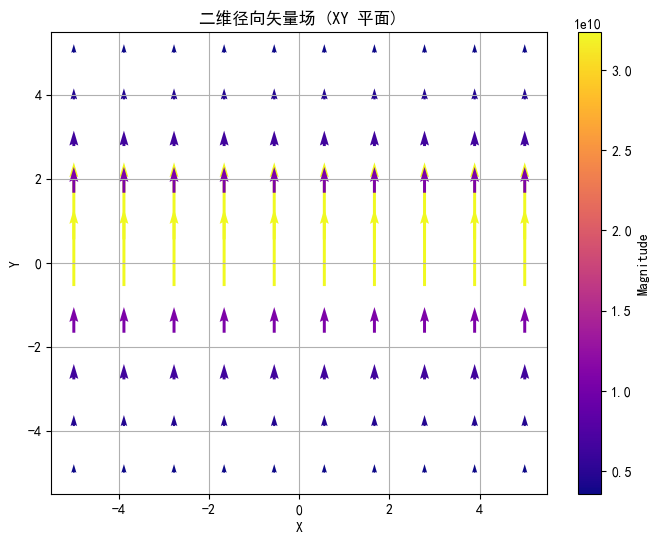

In [1]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    varepsilon_0 = 8.85e-12 # 真空中的介电常数
    # 电荷分布：均匀分布在 x 轴上，线密度是 lambda
    lam = 1 # 线密度

    A = 1 / (4 * np.pi * varepsilon_0) * (2 * lam) / (sp.sqrt(N.y**2)) * N.j
    print('矢量场：')
    display(A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 计算 x, y, z 方向的分量
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
    return A_x, A_y, A_z

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(0, 0, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量
A_x, A_y, A_z = vector_field(X, Y, Z)

# 绘制矢量场
plt.figure(figsize=(8, 6))
plt.quiver(X[:, :, 0], Y[:, :, 0], A_x[:, :, 0], A_y[:, :, 0], np.sqrt(A_x[:, :, 0]**2 + A_y[:, :, 0]**2), cmap='plasma')
plt.colorbar(label='Magnitude')
plt.title('二维径向矢量场 (XY 平面)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

##### 习题2.22

一条均匀带电的无限长直线，电荷线密度为 $\lambda$，求出距离线为 $s$ 处的电势。
计算所得电势的梯度，验证所得的电场是正确的。

以 $s = 1$ 为基点，零电势点：
$$
\begin{split}
  V(r)
  = & \int_1^{s} \frac{1}{4\pi\varepsilon_0} \frac{2\lambda}{s'} \text d s' \\
  = & \frac{2\lambda }{4\pi\varepsilon_0} \ln s' \bigg|_1^s \\
  = & \frac{2\lambda}{4\pi\varepsilon_0} \ln s
\end{split}
$$
